# HC model for brain applied to unhealthy

- Applying the 55 CpG site HC model to Alzheimer's and Huntington's patients
- The 55 common sites were found in unhealthy_wholeblood_top_100xgboost notebook and saved to the file being read in called brain_shared_healthy_unhealthy
- The unhealthy data was processed in brain_load_data.ipynb and saved to hunt_brain_55.csv for Huntington's patients and alz_brain_55.csv for Alzheimer's patients



In [1]:
import _pickle as cPickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
from xgboost import XGBRegressor
import xgboost as xgb
import matplotlib.pyplot as plt


In [42]:
park_blood_unhealthy=pd.read_csv('../../blood/parkinsons/park_blood_top_56.csv',index_col=0)  
alz_blood_unhealthy=pd.read_csv('../../blood/alzheimers/alz_blood_top_56.csv',index_col=0)  

Text(0.5, 1.0, "Alzheimer's blood tissue ages")

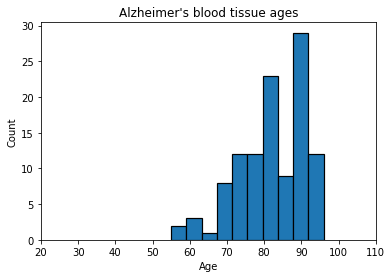

In [46]:
counts, bins = np.histogram(alz_blood_unhealthy['AGE'].astype(float).astype(int))
plt.hist(bins[:-1], bins, weights=counts,edgecolor='black', linewidth=1.2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim((20,110))
plt.title("Alzheimer's blood tissue ages")

Text(0.5, 1.0, "Parkinson's blood tissue ages")

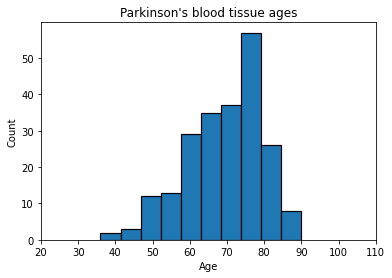

In [47]:
counts, bins = np.histogram(park_blood_unhealthy['AGE'].astype(float).astype(int))
plt.hist(bins[:-1], bins, weights=counts,edgecolor='black', linewidth=1.2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim((20,110))
plt.title("Parkinson's blood tissue ages")

### Reading in data

In [2]:
huntingtons_df=pd.read_csv('../huntingtons/hunt_brain_top_56.csv',index_col=0)  

Text(0.5, 1.0, "Huntington's brain tissue ages")

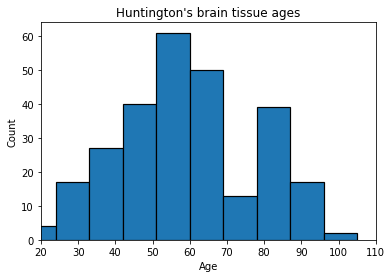

In [48]:
counts, bins = np.histogram(huntingtons_df['AGE'].astype(float).astype(int))
plt.hist(bins[:-1], bins, weights=counts,edgecolor='black', linewidth=1.2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim((20,110))
plt.title("Huntington's brain tissue ages")

In [3]:
alzheimers_df=pd.read_csv('../alzheimers/alz_brain_top_56.csv',index_col=0)  

Text(0.5, 1.0, "Alzheimer's brain tissue ages")

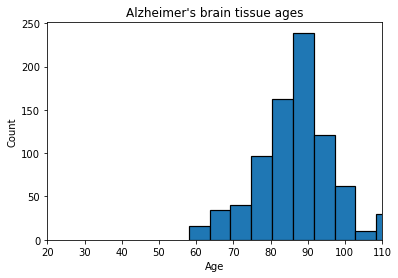

In [49]:
counts, bins = np.histogram(alzheimers_df['AGE'].astype(float).astype(int))
plt.hist(bins[:-1], bins, weights=counts,edgecolor='black', linewidth=1.2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim((20,110))
plt.title("Alzheimer's brain tissue ages")

In [22]:
hc_df=pd.read_csv('../healthy/hc_brain_55CpGs.csv',index_col=0)  

In [36]:
alzheimers_df

,AGE,cg00807959,cg01066472,cg13806070,cg15907146,cg17104258,cg24441324,cg22454769,cg23606718,cg24079702,...,cg19622662,cg23595055,cg04739123,cg16367511,cg18008766,cg19451698,cg04834794,cg07303143,cg21182694,cg23352942
GSM1068826,88.0,0.052,0.512,0.113,0.679,0.010,0.846,0.275,0.078,0.198,...,0.023,0.972,0.105,0.044,0.135,0.120,0.029,0.158000,0.243,0.407
GSM1068827,92.0,0.103,0.519,0.142,0.532,0.015,0.811,0.275,0.030,0.187,...,0.018,0.959,0.115,0.125,0.172,0.136,0.052,0.106000,0.265,0.444
GSM1068829,93.0,0.064,0.620,0.154,0.535,0.024,0.819,0.307,0.065,0.209,...,0.015,0.968,0.053,0.193,0.229,0.161,0.032,0.291445,0.329,0.480
GSM1068832,96.0,0.049,0.549,0.133,0.575,0.019,0.871,0.289,0.028,0.189,...,0.009,0.980,0.058,0.290,0.162,0.089,0.024,0.291445,0.317,0.422
GSM1068833,86.0,0.081,0.287,0.089,0.568,0.021,0.863,0.165,0.044,0.139,...,0.015,0.981,0.062,0.189,0.116,0.083,0.022,0.107000,0.236,0.431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2809060,80.0,0.364,0.635,0.144,0.692,0.189,0.910,0.407,0.202,0.274,...,0.115,0.950,0.069,0.153,0.111,0.083,0.081,0.291445,0.184,0.589
GSM2809061,70.0,0.366,0.520,0.118,0.554,0.394,0.887,0.383,0.221,0.249,...,0.311,0.910,0.075,0.117,0.090,0.058,0.054,0.291445,0.214,0.592
GSM2809062,75.0,0.328,0.321,0.124,0.610,0.134,0.892,0.400,0.130,0.253,...,0.101,0.943,0.031,0.161,0.072,0.056,0.064,0.285000,0.209,0.610
GSM2809063,79.0,0.356,0.537,0.145,0.668,0.143,0.895,0.390,0.166,0.251,...,0.097,0.935,0.051,0.117,0.110,0.054,0.074,0.291445,0.220,0.540


In [35]:
hc_df

,age,cg00807959,cg01066472,cg13806070,cg15907146,cg17104258,cg24441324,cg22454769,cg23606718,cg24079702,...,cg19622662,cg23595055,cg04739123,cg16367511,cg18008766,cg19451698,cg04834794,cg07303143,cg21182694,cg23352942
GSM2139432,71.0000,0.288,0.331,0.128,0.607,0.106,0.829,0.299,0.158,0.214,...,0.088,0.948,0.037,0.217,0.105,0.102,0.124,0.289,0.240,0.475
GSM2139249,76.0000,0.329,0.378,0.140,0.563,0.101,0.880,0.413,0.153,0.300,...,0.095,0.942,0.039,0.161,0.130,0.064,0.084,0.318,0.215,0.466
GSM2139398,102.0000,0.294,0.339,0.067,0.604,0.188,0.824,0.395,0.121,0.262,...,0.154,0.947,0.044,0.124,0.114,0.085,0.063,0.317,0.219,0.432
GSM2139297,108.0000,0.327,0.528,0.153,0.703,0.054,0.847,0.438,0.262,0.299,...,0.053,0.964,0.088,0.261,0.168,0.105,0.192,0.419,0.293,0.559
GSM1069208,40.0000,0.152,0.452,0.056,0.559,0.250,0.840,0.212,0.085,0.144,...,0.232,0.898,0.038,0.083,0.073,0.044,0.023,0.231,0.193,0.602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1871753,53.0000,0.215,0.498,0.127,0.624,0.216,0.900,0.133,0.151,0.064,...,0.194,0.977,0.044,0.094,0.054,0.038,0.048,0.205,0.201,0.740
GSM1438255,53.1594,0.198,0.510,0.049,0.568,0.289,0.878,0.119,0.145,0.168,...,0.236,0.925,0.029,0.072,0.024,0.022,0.036,0.124,0.172,0.540
GSM1438138,53.3855,0.239,0.329,0.114,0.622,0.292,0.770,0.332,0.161,0.224,...,0.233,0.932,0.072,0.090,0.046,0.029,0.053,0.203,0.188,0.450
GSM1438147,53.4770,0.239,0.466,0.058,0.682,0.196,0.909,0.301,0.162,0.203,...,0.226,0.966,0.037,0.162,0.085,0.060,0.074,0.174,0.220,0.524


In [28]:
un=list(hc_df.columns)[1:]
alz=list(alzheimers_df.columns)[1:]

#with open(r"../brain_shared_healthy_unhealthy", "rb") as input_file:
    #brain_shared_healthy_unhealthy = cPickle.load(input_file)
    
#brain_shared_healthy_unhealthy=list(brain_shared_healthy_unhealthy)
for i in un:
    if i not in alz:
        print(i)

cg00050873


In [ ]:
huntingtons_df=huntingtons_df.drop(columns=['ch.1.169608016R'])
alzheimers_df=alzheimers_df.drop(columns=['ch.1.169608016R'])   


In [29]:
hc_df=hc_df.drop(columns=['cg00050873'])   

### Reading in models

In [7]:
mod_55_brain = pd.read_pickle(r'../models/mod_55_brain')

In [8]:
mod_lasso_55_brain = pd.read_pickle(r'../models/mod_lasso_55_brain')

In [9]:
mod_ridge_55_brain = pd.read_pickle(r'../models/mod_ridge_55_brain')

In [10]:
XG_55_brain = pd.read_pickle(r'../models/XG_55_brain')

# Dealing with NAs

In [11]:
def drop_na_cols(df,percent=0.1):
    #Drop columns with >pearcent% NAs
    nas=df.isnull().sum()
    nas=nas[1:]

    for i in nas:
        if i>=len(df.index)*percent:
            try:
                df=df.drop(nas.keys()[i], axis=1)
            except KeyError:
                pass
    return df

In [12]:
def mean_impute(data):
    nas=data.isnull().sum()    
    col_means=data.mean(axis=0)
    na_cols=[]
    na_cols_means=[]

    for i in range(len(nas)):
        if nas[i]!=0:        
            na_cols.append(nas.keys()[i])
            na_cols_means.append(col_means[i])
        
    ids=list(data.index)
    for i in ids:
        for j in range(len(na_cols)):
            if str(data.loc[i][na_cols[j]])=="nan":
                data.loc[i][na_cols[j]]=na_cols_means[j]
    
    
    return data

In [13]:
def apply_model_and_plot(model,X,y,mod_name,group):
    #model is: mod_56_whole_blood 

    # Make predictions and evaluate
    preds_y = model.predict(X)
    rms = sqrt(mean_squared_error(y, preds_y))
    r2 = r2_score(y, preds_y)
    mae = mean_absolute_error(y,preds_y)

    # Plot 

    plt.scatter(y, preds_y, alpha=0.5)
    plt.plot(range(0,120), range(0,120), c='red')
    plt.xlabel('True Age')
    plt.ylabel('Predicted Age')
    plt.grid(True, lw=1.5, ls='--', alpha=0.75)
    plt.title(str(mod_name)+' on '+str(group))
    #a='rMSE:'+str(round(rms,3))
    b='MAE:'+str(round(mae,3))
    #plt.text(80, 15,'$%s$'%a,fontsize='large')
    plt.text(80, 1,'$%s$'%b,fontsize='large')
    plt.show()

    # print metric
    print(f'rMSE:{rms:.3f} years')
    print(f'r^2:{r2:.3f}')


## HC

In [31]:
hc_df

,age,cg00807959,cg01066472,cg13806070,cg15907146,cg17104258,cg24441324,cg22454769,cg23606718,cg24079702,...,cg19622662,cg23595055,cg04739123,cg16367511,cg18008766,cg19451698,cg04834794,cg07303143,cg21182694,cg23352942
GSM2139432,71.0000,0.288,0.331,0.128,0.607,0.106,0.829,0.299,0.158,0.214,...,0.088,0.948,0.037,0.217,0.105,0.102,0.124,0.289,0.240,0.475
GSM2139249,76.0000,0.329,0.378,0.140,0.563,0.101,0.880,0.413,0.153,0.300,...,0.095,0.942,0.039,0.161,0.130,0.064,0.084,0.318,0.215,0.466
GSM2139398,102.0000,0.294,0.339,0.067,0.604,0.188,0.824,0.395,0.121,0.262,...,0.154,0.947,0.044,0.124,0.114,0.085,0.063,0.317,0.219,0.432
GSM2139297,108.0000,0.327,0.528,0.153,0.703,0.054,0.847,0.438,0.262,0.299,...,0.053,0.964,0.088,0.261,0.168,0.105,0.192,0.419,0.293,0.559
GSM1069208,40.0000,0.152,0.452,0.056,0.559,0.250,0.840,0.212,0.085,0.144,...,0.232,0.898,0.038,0.083,0.073,0.044,0.023,0.231,0.193,0.602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1871753,53.0000,0.215,0.498,0.127,0.624,0.216,0.900,0.133,0.151,0.064,...,0.194,0.977,0.044,0.094,0.054,0.038,0.048,0.205,0.201,0.740
GSM1438255,53.1594,0.198,0.510,0.049,0.568,0.289,0.878,0.119,0.145,0.168,...,0.236,0.925,0.029,0.072,0.024,0.022,0.036,0.124,0.172,0.540
GSM1438138,53.3855,0.239,0.329,0.114,0.622,0.292,0.770,0.332,0.161,0.224,...,0.233,0.932,0.072,0.090,0.046,0.029,0.053,0.203,0.188,0.450
GSM1438147,53.4770,0.239,0.466,0.058,0.682,0.196,0.909,0.301,0.162,0.203,...,0.226,0.966,0.037,0.162,0.085,0.060,0.074,0.174,0.220,0.524


In [32]:
X_hc = mean_impute(hc_df.iloc[:, 1:])
y_hc = hc_df[['age']]

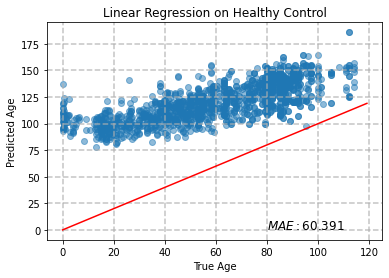

rMSE:63.015 years
r^2:-4.528


In [33]:
### Linear Regression
apply_model_and_plot(mod_55_brain,X_hc,y_hc,'Linear Regression',"Healthy Control")

## Alzheimer's 

In [14]:
X_alz = mean_impute(alzheimers_df.iloc[:, 1:])
y_alz = alzheimers_df[['AGE']]

### Linear Regression

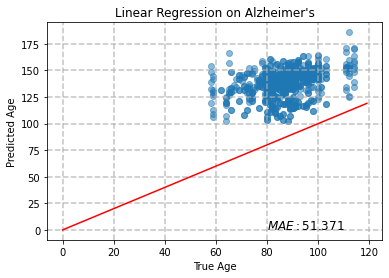

rMSE:53.145 years
r^2:-26.096


In [15]:
apply_model_and_plot(mod_55_brain,X_alz,y_alz,'Linear Regression',"Alzheimer's")

### Lasso

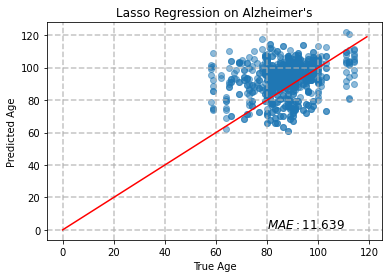

rMSE:14.514 years
r^2:-1.021


In [16]:
apply_model_and_plot(mod_lasso_55_brain,X_alz,y_alz,'Lasso Regression',"Alzheimer's")

### Ridge

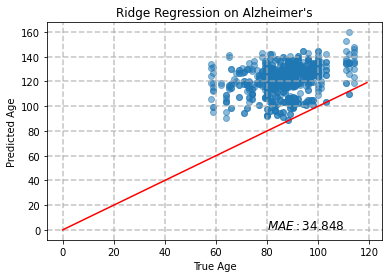

rMSE:37.133 years
r^2:-12.228


In [17]:
apply_model_and_plot(mod_ridge_55_brain,X_alz,y_alz,'Ridge Regression',"Alzheimer's")

## Huntington's 

In [18]:
X_hunt = mean_impute(huntingtons_df.iloc[:, 1:])
y_hunt = huntingtons_df[['AGE']]

### Linear Regression

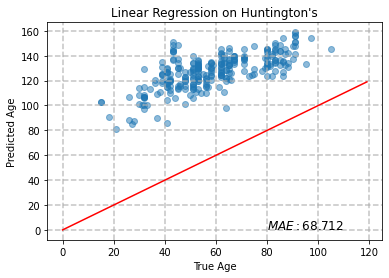

rMSE:69.941 years
r^2:-14.220


In [19]:
apply_model_and_plot(mod_55_brain,X_hunt,y_hunt,'Linear Regression',"Huntington's")

### Lasso

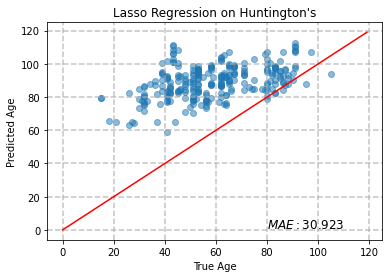

rMSE:34.724 years
r^2:-2.752


In [20]:
apply_model_and_plot(mod_lasso_55_brain,X_hunt,y_hunt,'Lasso Regression',"Huntington's")

### Ridge

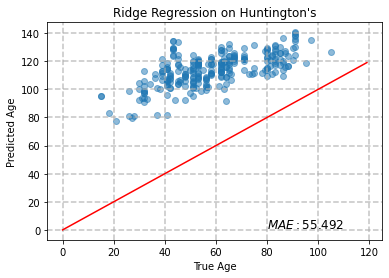

rMSE:57.169 years
r^2:-9.169


In [21]:
apply_model_and_plot(mod_ridge_55_brain,X_hunt,y_hunt,'Ridge Regression',"Huntington's")

# Saving the non-na data

## XGBoost

In [24]:
xgb_order=XG_56_whole_blood.get_booster().feature_names
#ln=['cg23078123', 'cg02933228', 'cg00329615', 'cg25410668', 'cg01256539', 'cg16054275', 'cg07418114', 'cg09692396', 'cg16932827', 'cg03607117', 'cg06977935', 'cg01552919', 'cg07927379', 'cg22285878', 'cg00292135', 'cg18343474', 'cg02046143', 'cg03883331', 'cg22454769', 'cg08453194', 'cg09809672', 'cg24724428', 'cg06540876', 'cg04875128', 'cg22452230', 'cg22193924', 'cg23606718', 'cg06784991', 'cg18933331', 'cg01074797', 'cg25256723', 'cg26614073', 'cg18877361', 'cg03404339', 'cg24079702', 'cg20273670', 'cg23744638', 'cg07955995', 'cg26113593', 'cg12252865', 'cg04503319', 'cg07553761', 'cg16867657', 'cg10221746', 'cg19344626', 'cg14692377', 'cg20532418', 'cg23091758', 'cg05308819', 'cg04573078', 'cg00776080', 'cg07181952', 'cg05093315', 'cg00535618', 'cg04208403', 'cg06639320']
#xgb_order=ln
alzheimers_df_xgb = alzheimers_df[['AGE']+xgb_order]
alzheimers_df_xgb


NameError: name 'XG_56_whole_blood' is not defined

In [154]:
X_alz_xgb = alzheimers_df_xgb.iloc[:, 1:].astype(float).to_numpy()
y_alz_xgb = alzheimers_df_xgb[['AGE']].astype(float).astype(int).to_numpy()



#X_alz_xgb.to_csv('alzheimers_df_xgb.csv', encoding='utf-8', index=True)

In [159]:
X_alz_xgb

array([[0.772, 0.364, 0.391, ..., 0.66 , 0.617, 0.83 ],
       [0.778, 0.409, 0.367, ..., 0.59 , 0.612, 0.742],
       [0.839, 0.429, 0.329, ..., 0.673, 0.635, 0.847],
       ...,
       [0.695, 0.139, 0.311, ..., 0.621, 0.61 , 0.814],
       [0.729, 0.233, 0.383, ..., 0.599, 0.671, 0.787],
       [0.813, 0.332, 0.431, ..., 0.656, 0.637, 0.803]])

In [150]:
dtest = xgb.DMatrix('alzheimers_df_xgb.csv?format=csv&label_column=1')

In [156]:
valid = xgb.DMatrix(data=X_alz_xgb,label=y_alz_xgb)

In [165]:
#model is: XG_56_whole_blood

# Make predictions and evaluate
preds_xg_alz = XG_56_whole_blood2.predict(X_alz_xgb)
rms_xg_alz = sqrt(mean_squared_error(y_alz_xgb, preds_xg_alz))
r2_xg_alz = r2_score(y_alz_xgb, preds_xg_alz)

# Plot 

plt.scatter(y_alz_xgb, preds_xg_alz, alpha=0.5)
plt.plot(range(40,100), range(40,100), c='red')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.title("XGBoost on Alzheimer's")
plt.show()
    
# print metric
print(f'The rms on the Alzheimers data is {rms_xg_alz:.3f} years')
print(f'The r^2 on the Alzheimers data is {r2_xg_alz:.3f}')


ValueError: feature_names mismatch: ['cg16867657', 'cg04875128', 'cg07553761', 'cg00292135', 'cg09809672', 'cg04208403', 'cg22454769', 'cg06639320', 'cg19344626', 'cg02046143', 'cg23606718', 'cg08453194', 'cg23744638', 'cg07927379', 'cg24724428', 'cg23078123', 'cg16932827', 'cg10221746', 'cg18877361', 'cg03607117', 'cg09692396', 'cg06784991', 'cg23091758', 'cg02933228', 'cg01552919', 'cg00329615', 'cg03883331', 'cg16054275', 'cg12252865', 'cg22285878', 'cg03404339', 'cg24079702', 'cg20273670', 'cg00776080', 'cg06540876', 'cg25410668', 'cg07955995', 'cg01074797', 'cg22452230', 'cg07418114', 'cg18933331', 'cg01256539', 'cg06977935', 'cg20532418', 'cg04573078', 'cg25256723', 'cg26614073', 'cg14692377', 'cg18343474', 'cg26113593', 'cg00535618', 'cg04503319', 'cg05308819', 'cg05093315', 'cg07181952', 'cg22193924'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55']
expected cg23078123, cg02933228, cg00329615, cg25410668, cg01256539, cg16054275, cg07418114, cg09692396, cg16932827, cg03607117, cg06977935, cg01552919, cg07927379, cg22285878, cg00292135, cg18343474, cg02046143, cg03883331, cg22454769, cg08453194, cg09809672, cg24724428, cg06540876, cg04875128, cg22452230, cg22193924, cg23606718, cg06784991, cg18933331, cg01074797, cg25256723, cg26614073, cg18877361, cg03404339, cg24079702, cg20273670, cg23744638, cg07955995, cg26113593, cg12252865, cg04503319, cg07553761, cg16867657, cg10221746, cg19344626, cg14692377, cg20532418, cg23091758, cg05308819, cg04573078, cg00776080, cg07181952, cg05093315, cg00535618, cg04208403, cg06639320 in input data
training data did not have the following fields: f23, f0, f54, f5, f32, f14, f6, f3, f4, f10, f52, f30, f41, f50, f39, f33, f18, f53, f34, f35, f22, f48, f26, f55, f36, f11, f19, f38, f7, f24, f44, f25, f15, f45, f20, f46, f51, f16, f13, f37, f17, f27, f40, f47, f21, f28, f49, f8, f1, f9, f29, f31, f42, f2, f12, f43

In [137]:
ln=['cg23078123', 'cg02933228', 'cg00329615', 'cg25410668', 'cg01256539', 'cg16054275', 'cg07418114', 'cg09692396', 'cg16932827', 'cg03607117', 'cg06977935', 'cg01552919', 'cg07927379', 'cg22285878', 'cg00292135', 'cg18343474', 'cg02046143', 'cg03883331', 'cg22454769', 'cg08453194', 'cg09809672', 'cg24724428', 'cg06540876', 'cg04875128', 'cg22452230', 'cg22193924', 'cg23606718', 'cg06784991', 'cg18933331', 'cg01074797', 'cg25256723', 'cg26614073', 'cg18877361', 'cg03404339', 'cg24079702', 'cg20273670', 'cg23744638', 'cg07955995', 'cg26113593', 'cg12252865', 'cg04503319', 'cg07553761', 'cg16867657', 'cg10221746', 'cg19344626', 'cg14692377', 'cg20532418', 'cg23091758', 'cg05308819', 'cg04573078', 'cg00776080', 'cg07181952', 'cg05093315', 'cg00535618', 'cg04208403', 'cg06639320']

In [163]:
XG_56_whole_blood.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.7,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}